# STA 141B Assignment 3

Due __Feb 11, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using web APIs and combining data from multiple sources.

## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

### 1.1 Function Design:

In [604]:
# Import libraries
import pandas as pd
import time
import re
import requests
import requests_cache
import numpy as np
import seaborn as sns
from plotnine import *
from pandas.api.types import CategoricalDtype
requests_cache.install_cache("ndb_cache")

In [605]:
# Write a function read API
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

# Get my API key code from txt.file
mykey=read_key("/Users/Sssiyuan/Documents/STA-141B/api_key.txt")

In [606]:
# Main function of ndb_search()
def  ndb_search(key, q, food_gp, ft):
    """
    The function is designed to make a reseach request on https://api.nal.usda.gov/ndb/search
    We would receive a basic informatiom reprot of a certain food including(NDB number, ds, name, group and manu)
    we asked the user to enter follow input:
    *key : user's private API key code.
    *q   : food term that want be searched.
    *food_gp : food group that help specify the food product.
    *ft  : the result's format, we set the default as JSON.
    
    """
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
        "api_key": key,
        "q": q,
        "fg": food_gp,
        "format": ft
    })
    response.raise_for_status()           # check feedback. 
    result = response.json()              # convert to JSON format.
    
    if  "errors" in result.keys():        # *return empty list if the search result is empty.
        return([])
    else:                                 # *return item list if the serach result is avaiable.
        result = result['list'] 
        result = result['item']
    
    time.sleep(0.3)                       # set time break
    return result
        

### 1.1 Check Function Result:

In [607]:
# 1.Test the function result (quail eggs)
res=ndb_search(mykey, "quail eggs", "", "JSON")
res

[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Pro

In [608]:
# 2.Test the function result (empty result)
res=ndb_search(mykey, "keyboard", "", "JSON")
res

[]

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

### 1.2 Import Dataset:

In [301]:
# Import dataset fresh.csv
fresh=pd.read_csv("./fresh.csv")
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit


### 1.2 Function Design:

### 1st step: Initial tidying.
***After checking the food name in the fresh.csv dataset, we would observe those names are not in the tidy form, which would be hard for make a accurate API request. Thus, we clean the strings. Moreover, we observe that we have several similar foods but labeled with same name. In fact, they are different by color or peeled situtaions. Also, to be precise, we want to apply algorithms to add those important information with our food names.**

In [609]:
# Write a function that accurate our food list search
def food_ls(data, typ):
    """
    The function is designed to return the more specific food name by using loops.
    Function asked the user to input 2 parameters:
    data: the dataset we want to research(fresh.csv)
    typ: enter food category("fruit" or "vegetables" or others)
    """
    # remove underscore sign in food names
    food=data.food.astype(str)                      
    food= [re.sub('_', ' ', fd) for fd in food]
    data.food=food
    
    # subset original dataset by type parameter and 
    # the sub dataset only contain food name, form and type.
    sub_data=data[['food', 'form', 'type']]          
    sub_data=sub_data[sub_data['type']==typ]         
    
    check=sub_data                                   
    count=0
    total=check.food.count()
    fd_list=[]
    
    # using loop to get the food. Inside our loop, we also define
    # a function called check_form. The function helps to add
    # information related to food form with food names
    while count < total:                             
        result=check.iloc[count]                      
        fd=result[0]                                 
        form=result[1]
        new_fd=check_form(fd,form)
        fd_list.append(new_fd)
        count+=1
    
    return fd_list
    
# Write a function that check food's special form 
# The function wants to add more useful information for API requests.
def check_form(fd, form):
    """
    The function is designed to check the food form and supply food name with those additional
    information for API search. The function is designed to result for one food. we would use it in 
    a loop to get all food names for dataset. The function asked two inputs:
    fd: food name
    form: food form
    """
    # check standards
    raw="fresh"
    peel=("with peel", "peeled")
    color=("red", "green", "blue", "yellow", "white", "brown", "black")
    
    # 1. check the food's peel type
    for one in peel:
        if one in form.lower():
            fd=fd+" "+one
        else:
            continue;
    
    # 2. check the food's color
    for clr in color:
        if clr in form.lower():
            fd=fd+" "+clr
        else:
            continue;
            
     # 3. check if the food is in raw type:
    if "green" in fd.lower():
        fd=fd+" raw"
    else:
        fd=fd
    
    return fd.capitalize()


In [610]:
# Get fruit and vegatable food list (more accurare and with first step tidying)
frt=food_ls(fresh, "fruit")
veg=food_ls(fresh, "vegetables")

### 2nd step: Check NDB Numbers.
***Since we have already get a more tidied and more specified food name list. We want to use those food names as our terms for API requests. Moreover, we divide the food name list into two categories: "fruit' and "vegetables". Because when we use the online research tool, we found that most raw food product are inside two food groups which are "Fruits and Fruit Juices" and "Vegetables and Vegetable Products". Thus, we clarify the food groups inside our functions and get foods' NDB number.**

In [611]:
# Define a function that get NDB from fresh.csv 
def get_NDB(term, fd_type):
    if fd_type=="fruit":
        categ1="Fruits and Fruit Juices"
        res=ndb_search(mykey, term, categ1, "JSON")
        if res==[]:
            return "non-avaiable"
        else:
            res=res[0]
            ndb=res['ndbno']
            return ndb
    elif fd_type=="vegetables":
        categ2="Vegetables and Vegetable Products"
        res=ndb_search(mykey, term, categ2, "JSON")
        if res==[]:
            return "non-avaiable"
        else:
            count=0
            total=len(res)
            while count<total:
                if "raw" in res[count]['name']:
                    ndb=res[count]['ndbno']
                    return ndb
                else:
                    count+=1

        
# Defina a function that help to return a list of NDB number
def list_NDB(food,fd_type):
    ndb_ls=[]
    count=0
    for one in food:
        ndb=get_NDB(one, fd_type)
        ndb_ls.append(ndb)
    return ndb_ls

In [612]:
# Get result of NDB numbers of fresh.csv
frg_ndb=list_NDB(frt, "fruit")
veg_ndb=list_NDB(veg,"vegetables")
total=frg_ndb+veg_ndb

### 1.2 Merge Data (return NDB number back into fresh.csv):

In [465]:
# Merge NDB numbers into fresh.csv data set
total=pd.Series(total)
fresh['ndbno']=total
new_fresh=fresh
new_fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09218
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09082
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021


### 1.2 Strategy Discussion:


**In order to find most NDB numebers for the food products inside our dataset(fresh.csv), I hope my function can use the correct, simple and useful food names as searching terms. In this way, when we use them to do request the response from dataset, we could get the satisfied result. In general, the food names are in a clean and tidy form. We only need to subtract the underscore sign, then most of them are in a correct form. However, it is not enough. Since the fresh.csv dataset also provide us specific food forms so that we could return different NDB numbers for the similar products. At this time, we applied three standards:**

**1. we check the product's peel situation(with peel or peeled);**

**2. we check product's color(YELLOW, GREEN, RED...);**

**3. we add "raw" string after each food product names.**

**so it can help us improve the search. Finally, when we perform the requesting with API, we double check the raw condition to make sure the search is accurate. Since API allowed us to add food group when doing the search, by online testing, we found that two food groups are great helpful for doing the search. They are Fruits and Fruit Juices" and "Vegetables and Vegetable Products". So, if from fresh.csv, by the column "type", we categorzied the food products into the above two food groups. In this way, I designed my function and applied those standards to get most NDB numbers for the products.**

__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

### 1.3 Function Design:

In [373]:
# Main function ndb_report()
def ndb_report(ndbno):
    """
    The function is designed to return a basic food report when user entered an avaibale NDB number.
    The function asked one parameter:
    * ndbno: NDB number of a food.
    """
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
        "api_key": mykey,
        "ndbno":ndbno,
        "type":"b",
        "format":"JSON"
    })
    response.raise_for_status()           # check feedback. 
    result = response.json()              # convert to JSON format.
    
    if  "errors" in result.keys():        # *return empty list if the search result is empty.
        return([])
    else:                                 # *return item list if the serach result is avaiable.
        result=result["foods"][0]["food"]["nutrients"]
    
    time.sleep(0.3)                       # set time break.
    return result

### 1.3 Check Function Result:

In [602]:
res=ndb_report("09279")
res

[{'nutrient_id': '255',
  'name': 'Water',
  'derivation': 'NONE',
  'group': 'Proximates',
  'unit': 'g',
  'value': '87.23',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '143.93'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '57.57'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '131.72'}]},
 {'nutrient_id': '208',
  'name': 'Energy',
  'derivation': 'NC',
  'group': 'Proximates',
  'unit': 'kcal',
  'value': '46',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '76'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '30'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '69'}]},
 {'nutrient_id': '203',
  'name': 'Protein',
  'derivation': 'NONE',
  'group': 'Proximates',


__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

### 1.4 Question(1): Are fruits typically higher in kilocalories, or vegetables?

#### 1.4.1 Function Design:

In [500]:
# Define a function that obtain Energy statistic of one food product
def get_EG(ndbno):
    data=ndb_report(ndbno)
    res=pd.DataFrame(data)
    new_res=res[['name','value','unit']]
    result=new_res.iloc[1]
    return result

# Define a function that get Energy statistic of a list of food products
def list_EG(ndb_list):
    new_df=pd.DataFrame([])
    for ndb in ndb_list :
        res=get_EG(ndb)
        new_df=new_df.append(res)
    return new_df;


#### 1.4.1 Data Collecting:

In [501]:
# use energy function to get a dateframe of food objects in fresh.csv
# subsetting the dataframe to food products with avaible NDB number:
eg_data=new_fresh[new_fresh['ndbno']!="non-avaiable"]
eg_data=eg_data.reset_index(drop=True)

fd_ndb=eg_data.ndbno
result=list_EG(fd_ndb)
result=result.reset_index()

In [507]:
# Merge fresh dataset with energy dataset
res=pd.merge(eg_data, result, left_index=True, right_index=True)
res

# Convert the value column into integers
kal=res.value.astype(int)
res.value=kal
res

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,index,name,unit,value
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326,1,Energy,kcal,30
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181,1,Energy,kcal,34
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09218,1,Energy,kcal,53
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316,1,Energy,kcal,32
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279,1,Energy,kcal,46
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09082,1,Energy,kcal,178
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302,1,Energy,kcal,52
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286,1,Energy,kcal,83
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266,1,Energy,kcal,50
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021,1,Energy,kcal,48


#### 1.4.1 Plot Visualization:

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 2 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


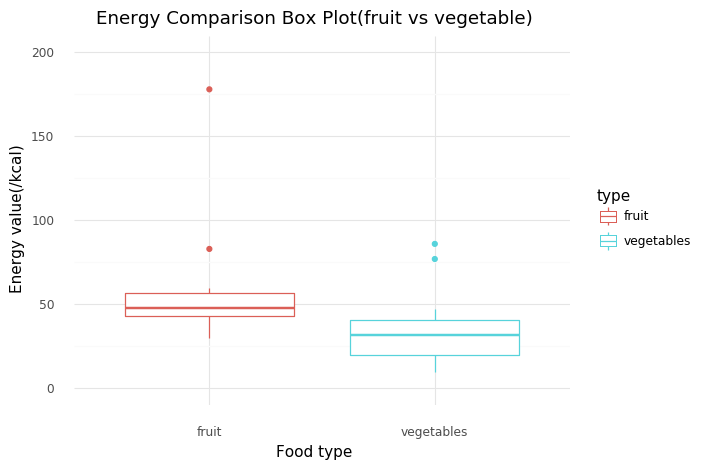

<ggplot: (-9223372029302337262)>


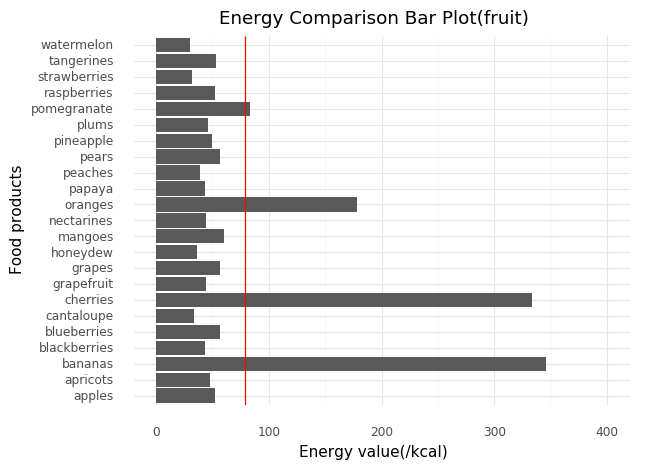

<ggplot: (7552063503)>


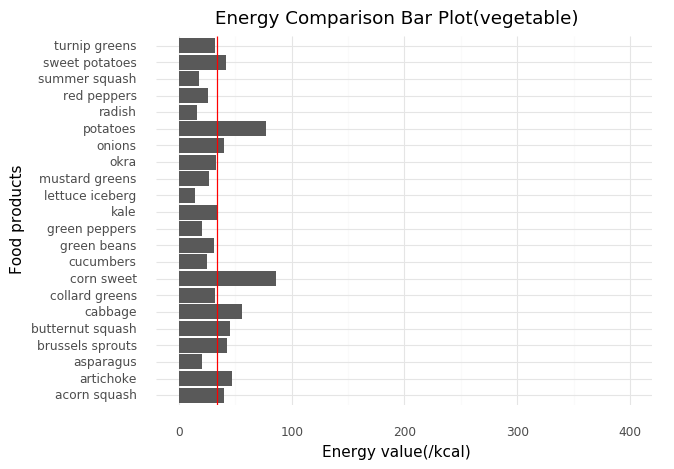

<ggplot: (294627809)>


In [508]:
# Use boxplot to visualize the Energy distribution of food products
# *1. Create the box plot
boxplot=(
   ggplot(res, aes(x='type', y='value', color='type')) +
   geom_boxplot()+
   theme_minimal()+
   ggtitle("Energy Comparison Box Plot(fruit vs vegetable)")+
   ylab("Energy value(/kcal)")+
   xlab("Food type")+
   ylim(0,200)

)

# Use bar plot to present the each energy value of food products
frt_eg=res[res["type"]=="fruit"]
veg_eg=res[res["type"]=="vegetables"]
frt_mean=frt_eg.loc[:,"value"].mean()
veg_mean=veg_eg.loc[:,"value"].mean()

# *2. Create the bar plot
barplot1=(
   ggplot(frt_eg, aes(x='food', y='value')) +
   geom_col()+
   theme_minimal()+
   ggtitle("Energy Comparison Bar Plot(fruit)")+
   ylab("Energy value(/kcal)")+
   xlab("Food products")+
   geom_hline(yintercept = frt_mean, colour='red')+
   ylim(0,400)+
   coord_flip()

)

barplot2=(
   ggplot(veg_eg, aes(x='food', y='value')) +
   geom_col()+
   theme_minimal()+
   ggtitle("Energy Comparison Bar Plot(vegetable)")+
   ylab("Energy value(/kcal)")+
   xlab("Food products")+
   geom_hline(yintercept = veg_mean, colour='red')+
   ylim(0,400)+
   coord_flip()

)

# *Present the plot
print(boxplot)
print(barplot1)
print(barplot2)


#### 1.4.1 Summary and Conclusions:

To understand which category of food has higher kilocalories, we first subset our dataset into two parts. One contained **only fruits and the contained only vegetables**. Recall the function we wrote in 1.3, we are able to use food products' NDB number to get a basic report of itself. Now to comaring the calories, **"Energy"** would be the best estimate model for the comparison between two types of food. we applied two kinds of plots for our data visualization.

**In the box plot**, under the same value range of calories, we could clearly observe that the fruits tend to have a higher calories than vegetables, because **the median Calory value of fruit is higher than the vegetables**. Moreover, we also observe that the **lower bound of boxplot for fruits approximately equals the upper bound of boxplot for vegetables**. The fact also demonstrated that fruits tend to contain higher calories.

Meanwhile, we also draw the bar plot for individual food product in fresh.csv. We summarized them into two plots with same calory range. To be more specific, we add **a vertical line that stands for the mean value for two categories**. By exploring the plot, we find that **the mean calory value for fruit is higher than that of vegetables**. We also discover that **some fruits (such as Cherries and Bananas) can have a extremely high value in calory. However, the case is barely happened in vegetale category**. According above, the fact suggests us that the fruits are likely to have higher valuee in calories than vegetables do.

### 1.4 Question(2) How does yield for fibrous foods (high in dietary fiber) compare to other foods? 

#### 1.4.2 Function Design:

In [511]:
# Define a function that get food product's dietary fiber value
def get_fiber(ndbno):
    data=ndb_report(ndbno)
    res=pd.DataFrame(data)
    new_res=res[['name','value','unit']]
    result=new_res.iloc[5]
    return result

# Define a function that get dietary fiber statistic of a list of food products
def list_fiber(ndb_list):
    new_df=pd.DataFrame([])
    for ndb in ndb_list :
        res=get_fiber(ndb)
        new_df=new_df.append(res)
    return new_df;

#### 1.4.2 Dataset Collecting:

In [598]:
# Getting data
fb_data=new_fresh[new_fresh['ndbno']!="non-avaiable"]
fb_data=eg_data.reset_index(drop=True)

fd_ndb=fb_data.ndbno
result=list_fiber(fd_ndb)
result=result.reset_index()

In [597]:
# Merge fresh dataset with dietary fiber dataset
res=pd.merge(fb_data, result, left_index=True, right_index=True)

# Convert the value column into integers
fib=res.value.astype(float)
res.value=fib

#### 1.4.2 Data Mining:

In [600]:
# Getting value summary of dietary fiber for foods in fresh.csv
fiber=res.value
Summary_fiber=fiber.describe()
print(Summary_fiber)

count    47.000000
mean      2.510638
std       1.805696
min       0.000000
25%       1.500000
50%       2.100000
75%       3.200000
max       9.900000
Name: value, dtype: float64


In [599]:
# Define a standard for food products having higher value in dietary fiber
fiber_stand=np.percentile(fiber, 75)

# Devide original dataset into two category:
# 1. Fibrous food(diteary fiber value > standard)
fibr_fd=res[res['value']>fiber_stand]

# 2. Non-fibrous food(diteary fiber value <= standard)
non_fibr_fd=res[res['value']<=fiber_stand]

# Calculate the mean of fibrous food Yield and non-fibrous food Yield
fib_mean=fibr_fd.loc[:,"yield"].mean()
nfib_mean=non_fibr_fd.loc[:,"yield"].mean()

# Add fibrous property in data set:
high = ['high'] * len(fibr_fd.value)
low  = ['low'] * len(non_fibr_fd.value)
fibr_fd['fiber']=high
non_fibr_fd['fiber']=low

# Combine the data set after we assign fibrous standard
new_data=fibr_fd.append(non_fibr_fd)
new_data

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,index,name,unit,value,fiber
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302,5,"Fiber, total dietary",g,6.5,high
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286,5,"Fiber, total dietary",g,4.0,high
13,Fresh1,0.549417,0.640000,0.330693,0.283889,bananas,fruit,09041,5,"Fiber, total dietary",g,9.9,high
19,Fresh1,5.661671,0.960000,0.319670,1.885279,blackberries,fruit,09042,5,"Fiber, total dietary",g,5.3,high
20,Fresh1,2.235873,0.960000,0.330693,0.770196,grapes,fruit,09129,5,"Fiber, total dietary",g,3.9,high
31,Fresh1,2.629468,1.160000,0.286601,0.649662,collard greens,vegetables,11161,5,"Fiber, total dietary",g,4.0,high
37,Fresh1,1.054409,0.811301,0.440925,0.573049,sweet potatoes,vegetables,11505,5,"Fiber, total dietary",g,5.3,high
41,Fresh1,2.877290,1.050000,0.286601,0.785366,kale,vegetables,11233,5,"Fiber, total dietary",g,4.1,high
42,Fresh1,2.363733,0.375309,0.385809,2.429865,artichoke,vegetables,11007,5,"Fiber, total dietary",g,5.4,high
45,Fresh1,2.962093,1.060000,0.341717,0.954902,brussels sprouts,vegetables,11098,5,"Fiber, total dietary",g,3.8,high


#### 1.4.2 Data Visualization:

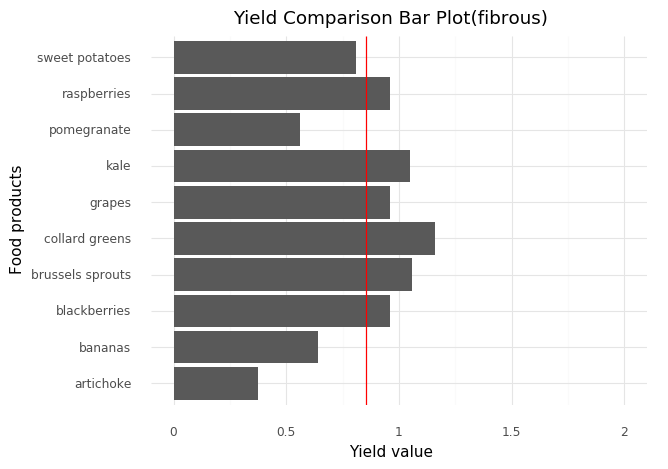

<ggplot: (-9223372029302926504)>


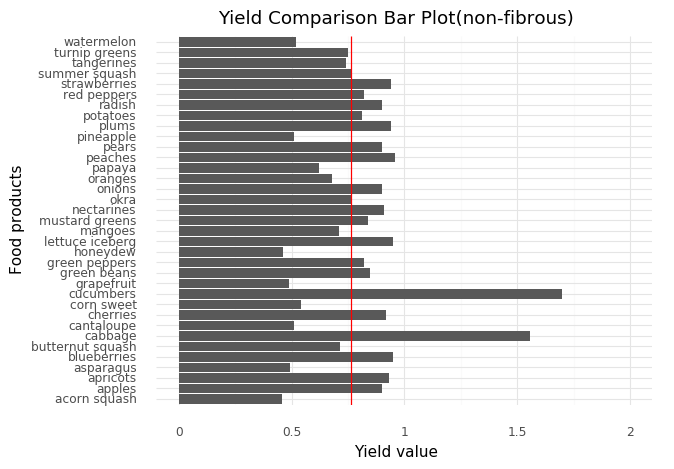

<ggplot: (7552931883)>


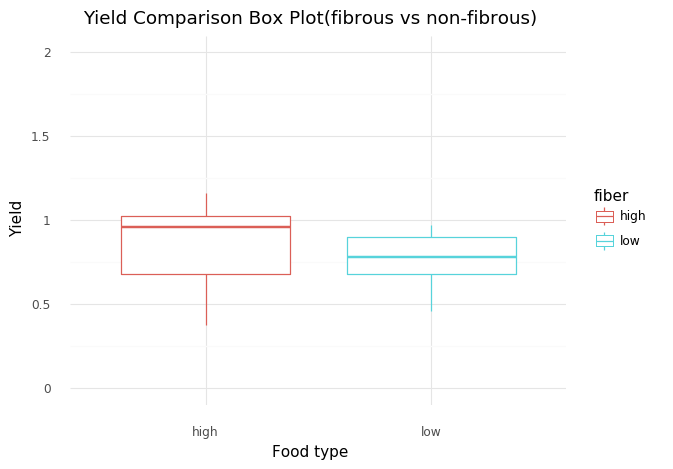

<ggplot: (-9223372029305013742)>


In [596]:
# 1.Create the bar plot
barplot1=(
   ggplot(fibr_fd, aes(x='food', y='yield')) +
   geom_col()+
   theme_minimal()+
   ggtitle("Yield Comparison Bar Plot(fibrous)")+
   ylab("Yield value")+
   xlab("Food products")+
   geom_hline(yintercept = fib_mean, colour='red')+
   ylim(0,2)+
   coord_flip()

)

barplot2=(
   ggplot(non_fibr_fd, aes(x='food', y='yield')) +
   geom_col()+
   theme_minimal()+
   ggtitle("Yield Comparison Bar Plot(non-fibrous)")+
   ylab("Yield value")+
   xlab("Food products")+
   geom_hline(yintercept = nfib_mean, colour='red')+
   ylim(0,2)+
   coord_flip()

)

# 2. Create box plot
boxplot=(
   ggplot(new_data, aes(x='fiber', y='yield', color='fiber')) +
   geom_boxplot()+
   theme_minimal()+
   ggtitle("Yield Comparison Box Plot(fibrous vs non-fibrous)")+
   ylab("Yield")+
   xlab("Food type")+
   ylim(0,2)
)

# present the plots
print(barplot1)
print(barplot2)
print(boxplot)

#### 1.4.2 Summary and Conclusions:

To understand the yield parameter's difference between fibrous and non-fibrous food, we need to **define a standard that helps to categorize the food products** from fresh.csv dataset. Again, we define functions to get dieatry values from the basic report. Then, we summarized the dataset and find the **75% percentile as a "watershed"**. That is, if a food product contains a dietary value above the standard, it would be categorized as "fibrous food". we gave them a new attribute **"high"** in the column of our dataset("fiber"). conversely, we defined the food below the standard as **"non-fibrous food"**.

we use the barplot and boxplot to visualize the dataset and interpret the Yield distribution. By boxplot, we clearly observed that the **median Yield value of fibrous food is higher than the non-fibrous food**. Meanwhile, the range is basicly the same. But, we are able to perceive that the fibrous food tend to have a higher yield than non-fibrous food.

More specifically, we find that in above two bar plots: there are **three fibrous food whose Yield value is above** 1.0. While the case happend only **twice in non-fibrous food group**. Compared to a small sample amount of fibrous food, we could conclude that the yield would be higher for the fibrous food. **Most importantly, the mean value of yield for Fibrous food is also higher than that of non-fibrous food**. This again support our conclusions.

